In [3]:
pip install deap

     |████████████████████████████████| 163kB 7.5MB/s 


In [27]:
from matplotlib import pyplot as plt
import random
from deap import creator, base, tools, algorithms
import numpy as np
import time
from shapely.geometry import Point

random.seed(123)

In [28]:
# City Options
NUM_CITIES = 15
MAX_X = 100
MAX_Y = 100

# Algorithm Options
POPULATION_SIZE = 300
MUTATION_RATIO = 0.1
CROSSOVER_RATIO = 0.5
NGEN = 40

In [30]:
# Generate Random Cities
cities = []
for i in range(NUM_CITIES):
    cities.append(Point(random.randint(0, 100), random.randint(0, 100)))

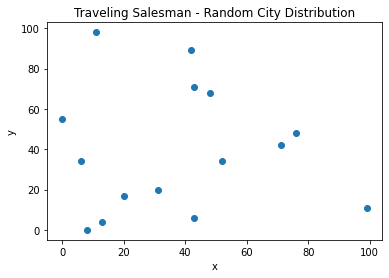

In [32]:
# Visualize Cities
plt.scatter([c.x for c in cities], [c.y for c in cities])

plt.xlabel("x")
plt.ylabel("y")

plt.title("Traveling Salesman - Random City Distribution")
plt.savefig("salesman.png")

Define Initialization, Fitness Function, Mating and Mutation

In [33]:

# Chromosome initialization: Random order of town indices
def ini_salesman(container, num_cities):
    basic_plan = list(range(num_cities))
    random.shuffle(basic_plan)
    return container(basic_plan)

In [34]:
test = ini_salesman(list, 10)

In [35]:
# Fitness Function: Total path length
def calc_distance(travel_plan, cities):
    dist = 0
    for i, e in enumerate(travel_plan):
        if i!= len(cities)-1:
            origin = cities[e]
            destination = cities[travel_plan[i+1]]
        else:
            # Return home
            origin = cities[e]
            destination = cities[travel_plan[0]]
        dist += origin.distance(destination)
    return dist,

In [36]:
# Mutation: Switch two random positions of the travel plan
def mutate_travel_plan(travel_plan):
    
    # Determine indices to be switched
    idx_1 = random.choice(list(range(len(travel_plan))))
    idx_2 = random.choice(list(range(len(travel_plan))))
    
    # Switch indices
    travel_plan[idx_1], travel_plan[idx_2] = travel_plan[idx_2], travel_plan[idx_1]
    
    return travel_plan,

In [37]:
# Mating two travel plans to generate one child: Retain x consecutive city ids of tp_1 and fill with tp_2 order
# Example:
# tp_1: [0,1,2,3,4,5]
# tp_2: [3,2,1,5,0,4]
# Retain: [1,2,3]
# Child: [5,1,2,3,0,4]
def mate_travel_plans_single(tp_1, tp_2):
    
    N = len(tp_1)
    
    idx_1 = random.choice(list(range(N)))
    idx_2 = random.choice(list(range(N)))
    
    idx_start = min(idx_1, idx_2)
    idx_stop = max(idx_1, idx_2)
    
    if idx_start==idx_stop:
        if idx_start > 0:
            idx_start = idx_start-1
        else:
            idx_stop = idx_stop+1
    
    retain_sequence = tp_1[idx_start:idx_stop+1]
    substitute_values = [i for i in tp_2 if i not in retain_sequence]
    substitute_places = [i for i in list(range(N)) if i<idx_start or i>idx_stop]
    
    for i in substitute_places:
        tp_1[i] = substitute_values.pop(0)
    
    return tp_1

In [38]:
# Test function
mate_travel_plans_single([0,1,2,3,4,5], [3,2,1,5,0,4])

[2, 1, 5, 3, 4, 0]

In [39]:
def mate_travel_plans(tp_1, tp_2):
    ind1 = mate_travel_plans_single(tp_1, tp_2)
    ind2 = mate_travel_plans_single(tp_1, tp_2)
    return ind1, ind2

In [40]:
# Define classes
# Create a class "total_distance". Define it as a fitness. Fitness shall be minimized (-1)
creator.create("total_distance", base.Fitness, weights=(-1.0,))

# Create a class "Individual" containing a list and assign a fitness of type "travel_distance"
creator.create("Individual", list, fitness=creator.total_distance) 

# Open a new toolbox
toolbox = base.Toolbox()

# Register an "individual" to be of class "Individual". Initialize it with the ini_salesman function. Pass necessary values
toolbox.register("individual", ini_salesman, creator.Individual, num_cities=NUM_CITIES)

# Register a "population" and initialize it with a list of "individual" objects
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Register a fitness function called "travel_distance" and assign an evaluation function (calc_distance) to it
toolbox.register("travel_distance", calc_distance, cities=cities)

# Register functions for mating, mutating and selecting
toolbox.register("mate", mate_travel_plans)
toolbox.register("mutate", mutate_travel_plan)
#toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.01)
toolbox.register("select", tools.selTournament, tournsize=10)

In [42]:
# Generate intial population
population = toolbox.population(n=POPULATION_SIZE)

In [43]:
for gen in range(NGEN):
    print("Calculating generation {} of {}".format(gen+1,NGEN))
    
    # Retrieve all new offsprings generated by mutation and crossover (mating)
    offspring = algorithms.varAnd(population, toolbox, cxpb=0.5, mutpb=MUTATION_RATIO)
    
    # For each individual in the toolbox that has not been evaluated before, evaluate the fitness
    fits = toolbox.map(toolbox.travel_distance, offspring)
    
    # Assign fitness values to individuals
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit
        
    # Create new population
    population = toolbox.select(offspring, k=len(population))

Calculating generation 1 of 40
Calculating generation 2 of 40
Calculating generation 3 of 40
Calculating generation 4 of 40
Calculating generation 5 of 40
Calculating generation 6 of 40
Calculating generation 7 of 40
Calculating generation 8 of 40
Calculating generation 9 of 40
Calculating generation 10 of 40
Calculating generation 11 of 40
Calculating generation 12 of 40
Calculating generation 13 of 40
Calculating generation 14 of 40
Calculating generation 15 of 40
Calculating generation 16 of 40
Calculating generation 17 of 40
Calculating generation 18 of 40
Calculating generation 19 of 40
Calculating generation 20 of 40
Calculating generation 21 of 40
Calculating generation 22 of 40
Calculating generation 23 of 40
Calculating generation 24 of 40
Calculating generation 25 of 40
Calculating generation 26 of 40
Calculating generation 27 of 40
Calculating generation 28 of 40
Calculating generation 29 of 40
Calculating generation 30 of 40
Calculating generation 31 of 40
Calculating gener

In [44]:

winner = tools.selBest(population, k=1)

In [45]:

winner 

[[1, 9, 8, 4, 2, 5, 13, 12, 6, 10, 7, 3, 14, 0, 11]]

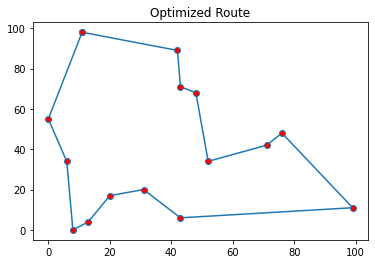

In [46]:
# Visualize Result
cities_ordered = [cities[e] for e in winner[0]]
X = [c.x for c in cities_ordered]+[cities_ordered[0].x]
Y = [c.y for c in cities_ordered]+[cities_ordered[0].y]
plt.plot(X,Y, marker = "o", markerfacecolor='red')
plt.title("Optimized Route")
plt.savefig("salesman_solution.png")